**Исследовательский проект**

**Выполнил: Нгуен Туан Минь, Щур Виктория Олеговна**

**Группа: БПИ238**
___

# **Описание данных**

___
 Название датасета: **heart_disease.csv**

In [1]:
import pandas as pd

df = pd.read_csv('/content/heart_disease.csv')

df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,result
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


___

Размер датасета - **270 строк на 14 столбцов**

In [2]:
df.shape

(270, 14)

___

**Названия и обозначение переменных:**




1. **Age** – возраст пациента. **(Метрическая)**  
2. **Sex** – пол пациента (обычно кодируется как 1 – мужчина, 0 – женщина). **(Категориальная - бинарная)**  
3. **Chest (Chest Pain Type, CP)** – тип боли в груди:  
   - 1: Типичная стенокардия  
   - 2: Атипичная стенокардия  
   - 3: Боль не связана со стенокардией  
   - 4: Отсутствие боли в груди  
   **(Категориальная - порядковая)**  
4. **Resting Blood Pressure (trestbps)** – артериальное давление в состоянии покоя (мм рт. ст.). **(Метрическая)**  
5. **Serum Cholesterol (chol)** – уровень холестерина в сыворотке крови (мг/дл). **(Метрическая)**  
6. **Fasting Blood Sugar (fbs)** – уровень сахара в крови натощак (обычно 1, если >120 мг/дл, иначе 0). **(Категориальная - бинарная)**  
7. **Resting Electrocardiographic Results (restecg)** – результаты электрокардиограммы в состоянии покоя:  
   - 0: Нормально  
   - 1: Имеются отклонения от нормы (например, признаки гипертрофии левого желудочка)  
   - 2: Вероятная или подтверждённая ишемия  
   **(Категориальная - порядковая)**  
8. **Maximum Heart Rate Achieved (thalach)** – максимальная достигнутая частота сердечных сокращений. **(Метрическая)**  
9. **Exercise Induced Angina (exang)** – индуцированная нагрузкой стенокардия (1 – да, 0 – нет). **(Категориальная - бинарная)**  
10. **Oldpeak** – депрессия сегмента ST при нагрузке по сравнению с покоем (измеряется в мм). **(Метрическая)**  
11. **Slope (ST slope)** – наклон сегмента ST во время пиковой нагрузки:  
    - 1: Восходящий  
    - 2: Горизонтальный  
    - 3: Нисходящий (наиболее серьёзный показатель)  
    **(Категориальная - порядковая)**  
12. **Thal (Thalassemia test result)** – результат теста на талассемию:  
    - 3: Нормальный  
    - 6: Фиксированный дефект  
    - 7: Обратимый дефект  
    **(Категориальная - номинальная)**  
13. **number of major vessels** - количество пораженных сердечных сосудров (3, 0, 1, 2)
14. **Result (Target, Diagnosis of heart disease)** – целевая переменная, указывающая наличие сердечного заболевания (0 – нет заболевания, 1 – есть заболевание). **(Категориальная - бинарная)**  

___
**Типы данных в датасете:**

In [3]:
df.dtypes

,0
age,int64
sex,int64
chest,int64
resting_blood_pressure,int64
serum_cholestoral,int64
fasting_blood_sugar,int64
resting_electrocardiographic_results,int64
maximum_heart_rate_achieved,int64
exercise_induced_angina,int64
oldpeak,float64


____
**Количество нулевых значений:**

In [4]:
df.isnull().sum()

,0
age,0
sex,0
chest,0
resting_blood_pressure,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_electrocardiographic_results,0
maximum_heart_rate_achieved,0
exercise_induced_angina,0
oldpeak,0


**Как мы можем заметить, пропущенные значения отсутствуют**
___



# **Обработка данных**

### **Создание новых колонок**

**Создадим колонку 'Blood Pressure to Age Ratio'**

Колонка будет представлять собой отношение между артериальным давлением в покое и возрастом пациента. Чем выше это соотношение, тем более это может быть тревожным сигналом.

**Формула**: BPAR = resting_blood_pressure/age

In [5]:
df['BPAR'] = df['resting_blood_pressure']/df['age']

df['BPAR'].head()

,BPAR
0,1.857143
1,1.716418
2,2.175439
3,2.000000
4,1.621622


___

**Создадим колонку 'Cholesterol to Max Heart Rate Ratio'**

Колонка будет отображать отношение уровня холестерина  и максимальной частоты сердечных сокращений. Это может дать представление о том, насколько высок уровень холестерина относительно способности сердца пациента справляться с физической нагрузкой.

**Формула:** CMHRR = serum_cholestoral/maximum_heart_rate_achieved

In [6]:
df['CMHRR'] = df['serum_cholestoral']/df['maximum_heart_rate_achieved']

df['CMHRR'].head()

,CMHRR
0,2.954128
1,3.525000
2,1.851064
3,2.504762
4,2.223140


____

**Создадим колонку 'High Risk Indicator'**

Создадим формулу для расчета индекса риска сердечного заболевания, который будет учитывать следующие параметры:

Возраст (Age)

* Возраст (Age)
* Уровень холестерина (serum_cholestoral)
* Максимальная частота сердечных сокращений (maximum_heart_rate_achieved)
* Артериальное давление в покое (resting_blood_pressure)
* Наличие индуцированной нагрузкой стенокардии (exercise_induced_angina)
* Сахар натощак (fasting_blood_sugar)

**Формула:** HRI = (age / 10) + (serum_cholestoral / 100) - (maximum_heart_rate_achieved / 10) + (resting_blood_pressure / 10) + (exercise_induced_angina * 10) + (fasting_blood_sugar * 5)

In [7]:
df['HRI'] = (df['age'] / 10) + (df['serum_cholestoral'] / 100) - (df['maximum_heart_rate_achieved'] / 10) + \
                         (df['resting_blood_pressure'] / 10) + (df['exercise_induced_angina'] * 10) + (df['fasting_blood_sugar'] * 5)
df['HRI'].head()

,HRI
0,12.32
1,7.84
2,6.61
3,21.33
4,19.99


### **Перекодировка метрической переменной в категориальную**

**Перекодируем столбик 'age' в 'Age Category'. Для этого проанализируем данный столбец**

In [8]:
df['age'].describe()

,age
count,270.000000
mean,54.433333
std,9.109067
min,29.000000
25%,48.000000
50%,55.000000
75%,61.000000
max,77.000000


Рекомендованные возрастные интервалы:
Исходя из **мин. = 29, макс. = 77, среднего = 54.4 и квартилей (25%, 50%, 75%)**, можно выделить такие группы:

1. **Молодые пациенты (29–40 лет)**  
   - Самые молодые участники, у которых риск сердечных заболеваний, как правило, ниже.

2. **Средний возраст (41–50 лет)**  
   - Люди в этом возрасте начинают входить в зону повышенного риска, особенно если есть другие факторы.

3. **Предпенсионный возраст (51–60 лет)**  
   - Здесь чаще всего проявляются сердечно-сосудистые заболевания.

4. **Пожилые пациенты (61–70 лет)**  
   - Наибольший риск сердечных заболеваний, требуется более пристальное внимание к здоровью.

5. **Старше 70 лет (71–77 лет)**  
   - Высокий возраст с максимальными рисками для сердечно-сосудистой системы.

___

Почему такие интервалы?
- Они основаны на **квартилях** (25%, 50%, 75%) + минимальном и максимальном значении.
- Категории **отражают физиологические изменения** с возрастом, влияющие на сердечно-сосудистую систему.
- Это позволяет **анализировать заболеваемость** в зависимости от возрастных групп.


In [9]:
def AgeToCategory(line):
  if (line <= 40):
    return "Молодые пациенты (29-40)"
  elif (40 < line <= 50):
    return "Средний возраст (41-50)"
  elif (50 < line <= 60):
    return "Предпенсионный возраст (51–60 лет)"
  elif (60 < line <= 70):
    return "Пожилые пациенты (61–70 лет)"
  else:
    return "Старше 70 лет"

df['Age Category'] = df['age'].apply(AgeToCategory)

df['Age Category'].head()

,Age Category
0,Пожилые пациенты (61–70 лет)
1,Пожилые пациенты (61–70 лет)
2,Предпенсионный возраст (51–60 лет)
3,Пожилые пациенты (61–70 лет)
4,Старше 70 лет


# **Цели и задачи исследования**

#### **Цель исследования**

Определить основные факторы, влияющие на развитие сердечно-сосудистых заболеваний.  

---

#### **Задачи исследования**  

1. **Анализ факторов риска**  
   - Выявить, какие показатели (возраст, холестерин, давление и т. д.) сильнее всего связаны с болезнью.  
   - Сравнить группы пациентов с и без сердечных заболеваний.   
2. **Выводы и рекомендации**  
   - Определить ключевые показатели риска.  
   - Дать рекомендации по профилактике заболеваний.  

# **Гипотезы исследования**

### **Гипотезы для исследования датасета "Heart Disease"**  

---

### **1. Гипотеза о возрасте**  
**H₀:** Возраст пациента не влияет на наличие сердечного заболевания.  
**H₁:** С возрастом риск сердечных заболеваний увеличивается.  

### **2. Гипотеза о половой принадлежности**  
**H₀:** Пол пациента не оказывает влияния на вероятность сердечного заболевания.  
**H₁:** Мужчины чаще страдают от сердечно-сосудистых заболеваний, чем женщины.  

### **3. Гипотеза об уровне холестерина**  
**H₀:** Уровень холестерина не связан с наличием сердечных заболеваний.  
**H₁:** Повышенный уровень холестерина увеличивает вероятность болезни.  

### **4. Гипотеза об артериальном давлении**  
**H₀:** Артериальное давление в состоянии покоя не влияет на наличие болезни.  
**H₁:** Высокое артериальное давление связано с повышенным риском сердечно-сосудистых заболеваний.  

### **5. Гипотеза о типе боли в груди**  
**H₀:** Тип боли в груди не является значимым фактором при диагностике.  
**H₁:** Определенные типы боли в груди (например, типичная стенокардия) чаще встречаются у пациентов с сердечными заболеваниями.  

### **6. Гипотеза о частоте сердечных сокращений**  
**H₀:** Максимальная частота сердечных сокращений не связана с заболеванием.  
**H₁:** У пациентов с сердечными заболеваниями наблюдается более низкая максимальная ЧСС.  

### **7. Гипотеза об уровне сахара в крови**  
**H₀:** Уровень сахара в крови натощак (>120 мг/дл) не связан с болезнями сердца.  
**H₁:** Пациенты с повышенным уровнем сахара в крови имеют более высокий риск сердечных заболеваний.  

### **8. Гипотеза о депрессии сегмента ST (Oldpeak)**  
**H₀:** Изменение сегмента ST при нагрузке (Oldpeak) не влияет на риск заболевания.  
**H₁:** Пациенты с высоким значением Oldpeak имеют больше шансов на наличие болезни.  

### **9. Гипотеза о стенокардии, вызванной нагрузкой (Exercise Induced Angina)**  
**H₀:** Индуцированная нагрузкой стенокардия (exang) не является предиктором болезни.  
**H₁:** Пациенты с индуцированной нагрузкой стенокардией чаще страдают от сердечных заболеваний.  

### **10. Гипотеза о числе пораженных сосудов (number_of_major_vessels)**  
**H₀:** Количество пораженных сосудов не влияет на вероятность заболевания.  
**H₁:** Чем больше пораженных сосудов, тем выше вероятность сердечного заболевания.  

---

# **Построение графиков**

### **График распределение возраста среди пациентов**

 **Цель:** Понять, как возраст распределяется среди пациентов и есть ли зависимость между возрастом и болезнью.

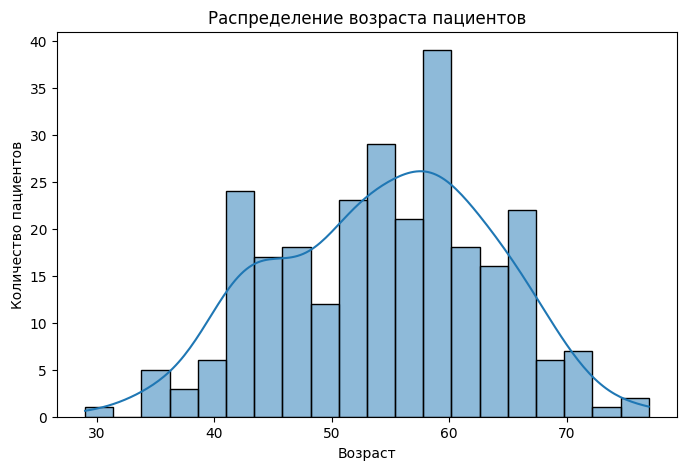

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Распределение возраста пациентов')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.show()


**Что можно сказать по графику?**  
1. **Основная концентрация пациентов** – в диапазоне **40-70 лет**, с пиком около **55-60 лет**.  
2. **Распределение не похоже на нормальное**.  
3. **Меньше всего пациентов младше 40 и старше 70 лет** – что логично, поскольку сердечно-сосудистые заболевания чаще встречаются у людей среднего и пожилого возраста.  
4. **Пик около 55-60 лет** подтверждает, что в этом возрасте риск сердечных заболеваний выше, что соответствует медицинской статистике.  
___


### **График зависимости пола и болезни**

**Цель:** Проверить, есть ли разница в частоте заболеваний между мужчинами и женщинами.

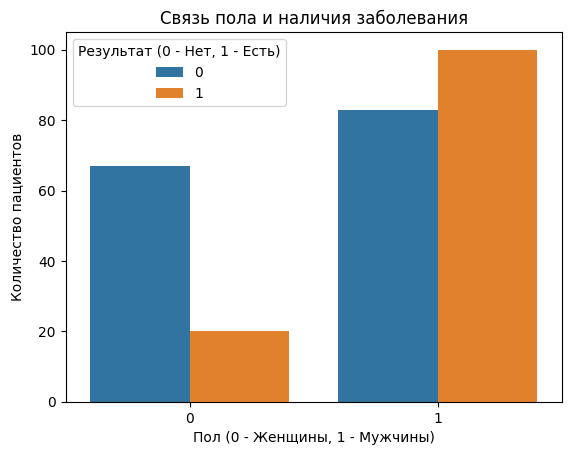

In [11]:
sns.countplot(x='sex', hue='result', data=df)
plt.title('Связь пола и наличия заболевания')
plt.xlabel('Пол (0 - Женщины, 1 - Мужчины)')
plt.ylabel('Количество пациентов')
plt.legend(title='Результат (0 - Нет, 1 - Есть)')
plt.show()

**Что можно сказать по графику?**

Мужчины (1) болеют чаще, чем женщины (0). У женщин отношение здоровых пациентов к больным больше, чем у мужчин.



### **Взаимосвязь артериального давления и возраста**

**Цель:** Проверить, растет ли давление с возрастом.

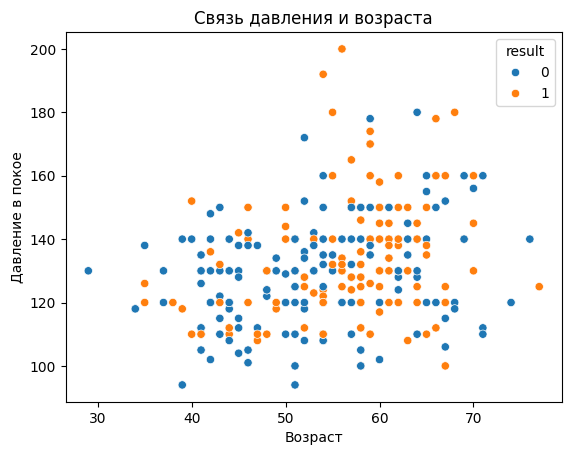

In [12]:
sns.scatterplot(x='age', y='resting_blood_pressure', hue='result', data=df)
plt.title('Связь давления и возраста')
plt.xlabel('Возраст')
plt.ylabel('Давление в покое')
plt.show()

**Что можно сказать по графику?**
1. **Явной зависимости между возрастом и давлением нет**  
   - Давление **разбросано** по всем возрастным группам.  
   - Однако в среднем **чем старше пациент, тем выше вероятность повышенного давления** (но это не строгая зависимость).  

2. **Пациенты с заболеванием (оранжевые точки) чаще имеют повышенное давление**  
   - Среди пациентов с **давлением выше 140 мм рт. ст.** (особенно ближе к 160–180) **заметно больше оранжевых точек**, что указывает на возможную связь между высоким давлением и болезнью.  
   - Однако есть и пациенты с нормальным давлением, у которых тоже есть болезнь.  

3. **Высокое давление встречается в любом возрасте**  
   - Даже среди пациентов **до 50 лет** встречаются случаи высокого давления (160–200).  
   - Это говорит о том, что гипертония — не только возрастной фактор.  

4. **Большинство пациентов имеют давление от 110 до 160 мм рт. ст.**  
   - В основном точки сгруппированы **в диапазоне 110–160 мм рт. ст.**, что соответствует среднему артериальному давлению у взрослых.  



### **Количество пораженных сосудов и болезнь**

**Цель:** Узнать, влияет ли число пораженных сосудов на вероятность заболевания.

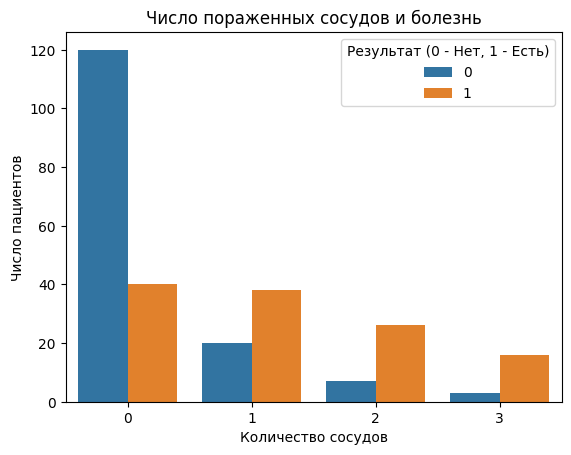

In [13]:
sns.countplot(x='number_of_major_vessels', hue='result', data=df)
plt.title('Число пораженных сосудов и болезнь')
plt.xlabel('Количество сосудов')
plt.ylabel('Число пациентов')
plt.legend(title='Результат (0 - Нет, 1 - Есть)')
plt.show()

**Что можно сказать по графику?**
1. **Пациенты без пораженных сосудов (0) в основном здоровы**  
   - Большинство пациентов с **0 пораженных сосудов (синий столбец)** **не имеют болезни**.  
   - Однако есть и некоторое количество больных среди этой группы (оранжевые столбцы).  

2. **Чем больше пораженных сосудов, тем выше вероятность болезни**  
   - У пациентов с **1, 2 или 3 пораженными сосудами** **болезнь встречается гораздо чаще**, чем у тех, у кого сосуды не поражены.  
   - Для **2 и 3 пораженных сосудов** количество больных значительно превышает число здоровых.  

---



### **Распределение уровня холестерина**

**Цель:** Проверить уровень холестерина у здоровых и больных пациентов, выявить выбросы.

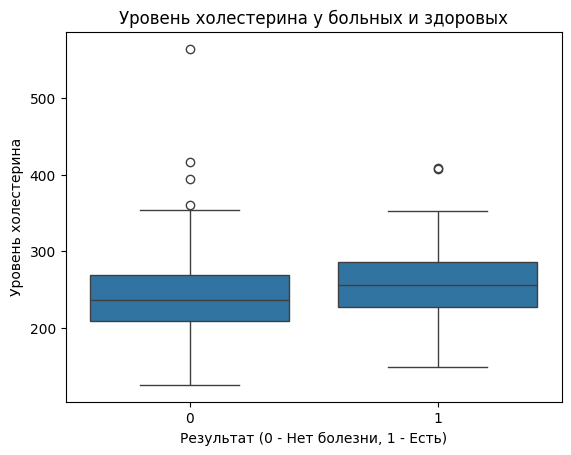

In [14]:
sns.boxplot(x='result', y='serum_cholestoral', data=df)
plt.title('Уровень холестерина у больных и здоровых')
plt.xlabel('Результат (0 - Нет болезни, 1 - Есть)')
plt.ylabel('Уровень холестерина')
plt.show()

**Что можно сказать по графику?**  
1. **Средний уровень холестерина у больных и здоровых примерно одинаковый**  
   - Медианы (центральные линии в ящиках) у **обеих групп похожи** (~230-250 мг/дл).  
   - Это означает, что **уровень холестерина сам по себе не является явным индикатором болезни**.  

2. **Разброс значений холестерина широкий**  
   - Уровень холестерина **варьируется примерно от 130 до 350 мг/дл** у большинства пациентов (межквартильный размах).  
   - Есть несколько **аномально высоких значений (> 400 мг/дл)**, которые можно считать выбросами.  

3. **Выбросы встречаются в обеих группах**  
   - Есть пациенты с очень высоким уровнем холестерина (>500 мг/дл), но они есть и среди больных, и среди здоровых.  
   - Это может говорить о том, что **сам по себе холестерин не всегда напрямую связан с болезнью** – возможны другие влияющие факторы.  
---


# **Построение сводных таблиц**

### **Сводная таблица №1**

Для начала построим сводную таблицу о среднем значении артериального давления в спокойном состоянии в зависимости от пола.

In [15]:
table = pd.pivot_table(df, values=['resting_blood_pressure'], index='sex', aggfunc='mean')
table

,resting_blood_pressure
sex,
0,132.965517
1,130.573770


**Выводы:** Можем заметить, что у мужчин давление ниже, чем у женщин, однако разница минимальна.

### **Сводная таблица №2**

Построим сводную таблицу о среднем значении уровня холестерина и максимальной частоты сердечных сокращений в зависимости от возрастной группы.

In [16]:
table = pd.pivot_table(df, values=['serum_cholestoral', 'maximum_heart_rate_achieved'], index='Age Category', aggfunc='mean')
table

,maximum_heart_rate_achieved,serum_cholestoral
Age Category,,
Молодые пациенты (29-40),169.933333,218.866667
Пожилые пациенты (61–70 лет),138.484848,266.196970
Предпенсионный возраст (51–60 лет),148.508929,251.598214
Средний возраст (41-50),158.802817,237.901408
Старше 70 лет,136.000000,247.666667


**Выводы по данным:**

1. **Максимальная ЧСС (частота сердечных сокращений) снижается с возрастом**  
   - **У молодых (29-40 лет):** 169.9  
   - **У пожилых (61-70 лет):** 138.5  
   - **У старше 70 лет:** 136.0  
   - **Чем старше пациент, тем ниже его максимальная ЧСС**, что ожидаемо, так как с возрастом сердечно-сосудистая система ослабевает.  

2. **Уровень холестерина растет с возрастом**  
   - **У молодых (29-40 лет):** 218.9  
   - **У пожилых (61-70 лет):** 266.2  
   - **Пик холестерина приходится на 61-70 лет**, затем немного снижается у самых пожилых (>70).  
   - Это согласуется с тем, что **с возрастом обмен веществ замедляется, и уровень холестерина повышается**.  

3. **Возрастная группа 51-60 лет – переходная**  
   - **Максимальная ЧСС падает до 148.5**, а холестерин **растет до 251.6**.  
   - Это критический период, когда риски сердечно-сосудистых заболеваний начинают резко возрастать.  

---





### **Сводная таблица №3**

Построим сводную таблицу о среднем значении холестерина и максимального ЧСС для мужчин и женщин

In [17]:
table = pd.pivot_table(df, values=['serum_cholestoral', 'maximum_heart_rate_achieved'], index='sex', aggfunc='mean')
table

,maximum_heart_rate_achieved,serum_cholestoral
sex,,
0,152.229885,264.747126
1,148.464481,242.486339



**Выводы по данным:**
1. **Женщины (sex = 0) имеют выше среднюю максимальную ЧСС, чем мужчины**  
   - **Женщины:** 152.23  
   - **Мужчины:** 148.46  
   - Это ожидаемо, так как у женщин **сердце обычно бьется быстрее, чем у мужчин**.  

2. **Женщины имеют в среднем более высокий уровень холестерина**  
   - **Женщины:** 264.75  
   - **Мужчины:** 242.49  
   - Это также согласуется с медицинскими данными: **женщины, особенно после менопаузы, склонны к повышенному холестерину**.  
   https://astra-cardio.ru/News/News/080923?

---



### **Тест Хи-Квадрат**

**Гипотезы:**

**1. Проверка зависимости между возрастной категорией и полом**
- **Нулевая гипотеза (H₀)**: Возрастная категория и пол **независимы**, то есть распределение пола **одинаковое во всех возрастных группах**.
- **Альтернативная гипотеза (H₁)**: Возрастная категория и пол **связаны**, то есть **распределение мужчин и женщин различается в разных возрастных группах**.

---

 **2. Проверка зависимости между уровнем сахара в крови и тестом на талассемию**
- **Нулевая гипотеза (H₀)**: Уровень сахара натощак и результаты теста на талассемию **независимы**, то есть **люди с разными уровнями сахара в крови имеют одинаковую вероятность различных результатов теста на талассемию**.
- **Альтернативная гипотеза (H₁)**: Между уровнем сахара и тестом на талассемию **есть связь**, то есть **определенные уровни сахара чаще встречаются у людей с определенными результатами теста**.

---


In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Проверяем зависимость между Возрастными категориями и Полом
ct_age_gender = pd.crosstab(df['Age Category'], df['sex'])
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(ct_age_gender)

print("Тест хи-квадрат для Возрастных категорий и Пола")
print(f"Chi-squared: {chi2_gender}")
print(f"P-value: {p_gender}")
print(f"Degrees of freedom: {dof_gender}")

print()

# 2. Проверяем зависимость между Уровнем сахара в крови и тестом на Талласемию
ct_thal_sugar = pd.crosstab(df['fasting_blood_sugar'], df['thal'])
chi2_thal, p_thal, dof_thal, expected_thal = chi2_contingency(ct_thal_sugar)

print("Тест хи-квадрат для Возрастных категорий и Пола")
print(f"Chi-squared: {chi2_thal}")
print(f"P-value: {p_thal}")
print(f"Degrees of freedom: {dof_thal}")


Тест хи-квадрат для Возрастных категорий и Пола
Chi-squared: 11.773547006898786
P-value: 0.019117123734390024
Degrees of freedom: 4

Тест хи-квадрат для Возрастных категорий и Пола
Chi-squared: 1.009160390524807
P-value: 0.6037589831139227
Degrees of freedom: 2


**Вывод после проведения теста Хи-Квадрат:**

---

**Анализ результатов:**
**1. Возрастная категория vs Пол**
- **Хи-квадрат = 11.77**
- **P-value = 0.019**
- **Степени свободы = 4**
- **Вывод:**  
  - Значение **p < 0.05**, значит, есть **статистически значимая зависимость** между возрастными категориями и полом.  
  - Это означает, что **распределение пола среди разных возрастных групп неоднородно**.

---

**2. Уровень сахара в крови vs Тест на Талассемию**
- **Хи-квадрат = 1.009**
- **P-value = 0.60**
- **Степени свободы = 2**
- **Вывод:**  
  - Значение **p > 0.05**, значит, **нет статистически значимой связи** между уровнем сахара в крови и результатами теста на талассемию.  
  - Это значит, что **тест на талассемию не зависит от уровня сахара в крови**.

---
**Вывод из теста 1**:  
- p-value **= 0.019 (< 0.05)** → отвергаем \(H_0\), значит, **пол распределен неравномерно по возрастным категориям**.

**Вывод из теста 2**:  
- p-value **= 0.60 (> 0.05)** → принимаем \(H_0\), значит, **уровень сахара не влияет на результаты теста на талассемию**.
___

1️⃣ **Возрастная категория и пол – зависимы** (различия статистически значимы).  
2️⃣ **Уровень сахара и талассемия – независимы** (различия случайны).  

# **Расчет описательной статистики**

Рассмотрим основные статистические показатели датасета

**1. Основные статистики для переменных**

In [19]:
df.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,result,BPAR,CMHRR,HRI
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444,2.470818,1.715028,10.143630
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827,0.475357,0.468856,7.112513
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000,1.492537,0.728324,-2.610000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000,2.159314,1.382883,4.202500
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000,2.412025,1.622425,8.690000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000,2.727273,1.938725,15.980000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000,4.482759,3.525000,30.180000


**1. Рассмотрим категориальные переменные**

In [20]:
df_categorical = df[['sex', 'chest', 'result', 'fasting_blood_sugar', 'exercise_induced_angina', 'slope']]

description = df_categorical.describe()
proportions = df_categorical.apply(lambda x: x.value_counts(normalize=True))

proportion_row = pd.Series({col: proportions[col].mean() for col in proportions.columns})

description.loc['proportion'] = proportion_row

description

,sex,chest,result,fasting_blood_sugar,exercise_induced_angina,slope
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.677778,3.174074,0.444444,0.148148,0.329630,1.585185
std,0.468195,0.950090,0.497827,0.355906,0.470952,0.614390
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,4.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000
proportion,0.500000,0.250000,0.500000,0.500000,0.500000,0.333333


Выводы по категориальны переменным

1. sex (пол):
В выборке преобладают мужчины (68%), что может указывать на гендерные различия в распространённости сердечно-сосудистых заболеваний.
В целом, по общей статистике, мужчины чаще подвержены риску сердечных заболеваний, что может объяснить их преобладание в выборке.
2. chest (тип боли в груди):
Наиболее распространённый тип боли — атипичная стенокардия, что может указывать на нетипичные проявления сердечных патологий.
3. result (результат):
У 44% пациентов результат положительный (наличие заболевания), что указывает на значительную долю пациентов с патологиями.
4. fasting_blood_sugar (уровень сахара натощак):
У 15% пациентов уровень сахара повышен, что может быть фактором риска для развития сердечно-сосудистых заболеваний.
5. exercise_induced_angina (стенокардия, вызванная физической нагрузкой):
У 33% пациентов наблюдается стенокардия при нагрузке, что может указывать на ишемическую болезнь сердца.
6. slope (наклон сегмента ST):
Наиболее распространённый наклон — плоский, что может указывать на наличие ишемии.

**2. Рассмотрим две порядковые переменные**

In [21]:
df_ordinal = df[['age', 'resting_blood_pressure']]

median_age = df_ordinal['age'].median()
mode_age = df_ordinal['age'].mode()[0]
proportion_mode_age = len(df_ordinal[df_ordinal['age'] == mode_age]) / len(df_ordinal['age'])

median_bp = df_ordinal['resting_blood_pressure'].median()
mode_bp = df_ordinal['resting_blood_pressure'].mode()[0]
proportion_mode_bp = len(df_ordinal[df_ordinal['resting_blood_pressure'] == mode_bp]) / len(df_ordinal['resting_blood_pressure'])

q1_age = df_ordinal['age'].quantile(0.25)
q3_age = df_ordinal['age'].quantile(0.75)
quartile_deviation_age = (q3_age - q1_age) / 2

q1_bp = df_ordinal['resting_blood_pressure'].quantile(0.25)
q3_bp = df_ordinal['resting_blood_pressure'].quantile(0.75)
quartile_deviation_bp = (q3_bp - q1_bp) / 2

summary_df = pd.DataFrame({
    'Statistic': ['Median', 'Mode', 'Proportion of Mode', 'Quartile Deviation'],
    'Age': [median_age, mode_age, proportion_mode_age, quartile_deviation_age],
    'Resting Blood Pressure': [median_bp, mode_bp, proportion_mode_bp, quartile_deviation_bp]
})

summary_df

,Statistic,Age,Resting Blood Pressure
0,Median,55.000000,130.000000
1,Mode,54.000000,120.000000
2,Proportion of Mode,0.059259,0.125926
3,Quartile Deviation,6.500000,10.000000



1. age (возраст):
Медиана возраста — 55 лет, мода — 54 года, что указывает на то, что большинство пациентов находятся в возрасте 50-60 лет.
Квартильное отклонение (6.5 лет) показывает умеренный разброс данных.
2. resting_blood_pressure (артериальное давление в покое):
Медиана давления — 130 мм рт. ст., мода — 120 мм рт. ст., что указывает на то, что у большинства пациентов давление близко к верхней границе нормы.
Квартильное отклонение (10 мм рт. ст.) показывает умеренный разброс данных.


**3. Рассмотрим метрические переменные**

In [22]:
metric_vars = ['serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak']

df_metric = df[metric_vars]

data = {}

for var in metric_vars:
    data[var] = [df_metric[var].mean(), df_metric[var].median(), df_metric[var].mode()[0], df_metric[var].std()]

summary_df = pd.DataFrame(data, index=['Mean', 'Median', 'Mode', 'Std'])
summary_df

,serum_cholestoral,maximum_heart_rate_achieved,oldpeak
Mean,249.659259,149.677778,1.05000
Median,245.000000,153.500000,0.80000
Mode,234.000000,162.000000,0.00000
Std,51.686237,23.165717,1.14521


1. serum_cholestoral (уровень холестерина):
Средний уровень холестерина — 249.66 мг/дл, что близко к верхней границе нормы.
Стандартное отклонение (51.69) указывает на значительный разброс данных.
2. maximum_heart_rate_achieved (максимальная частота сердечных сокращений):
Средняя максимальная ЧСС — 149.68 уд/мин, что соответствует норме для физической нагрузки.
Стандартное отклонение (23.17) указывает на умеренный разброс данных.
3. oldpeak (депрессия сегмента ST):
Среднее значение — 1.05, медиана — 0.8, что указывает на наличие депрессии сегмента ST у части пациентов.
Стандартное отклонение (1.15) указывает на значительный разброс данных.


Выводы по общей совокупности:
* В выборке преобладают мужчины (68%) с атипичной стенокардией
* Средний возраст пациентов — 54-55 лет, с умеренным разбросом
* Уровень холестерина и артериальное давление в среднем близки к верхней границе нормы
* Наибольший разброс наблюдается в уровне холестерина и депрессии сегмента ST, что может указывать на наличие подгрупп пациентов с разными уровнями риска
* Уровень сахара натощак и стенокардия при нагрузке имеют меньший разброс, но их наличие у части пациентов требует внимания

# **Подсчёт корреляционной матрицы**

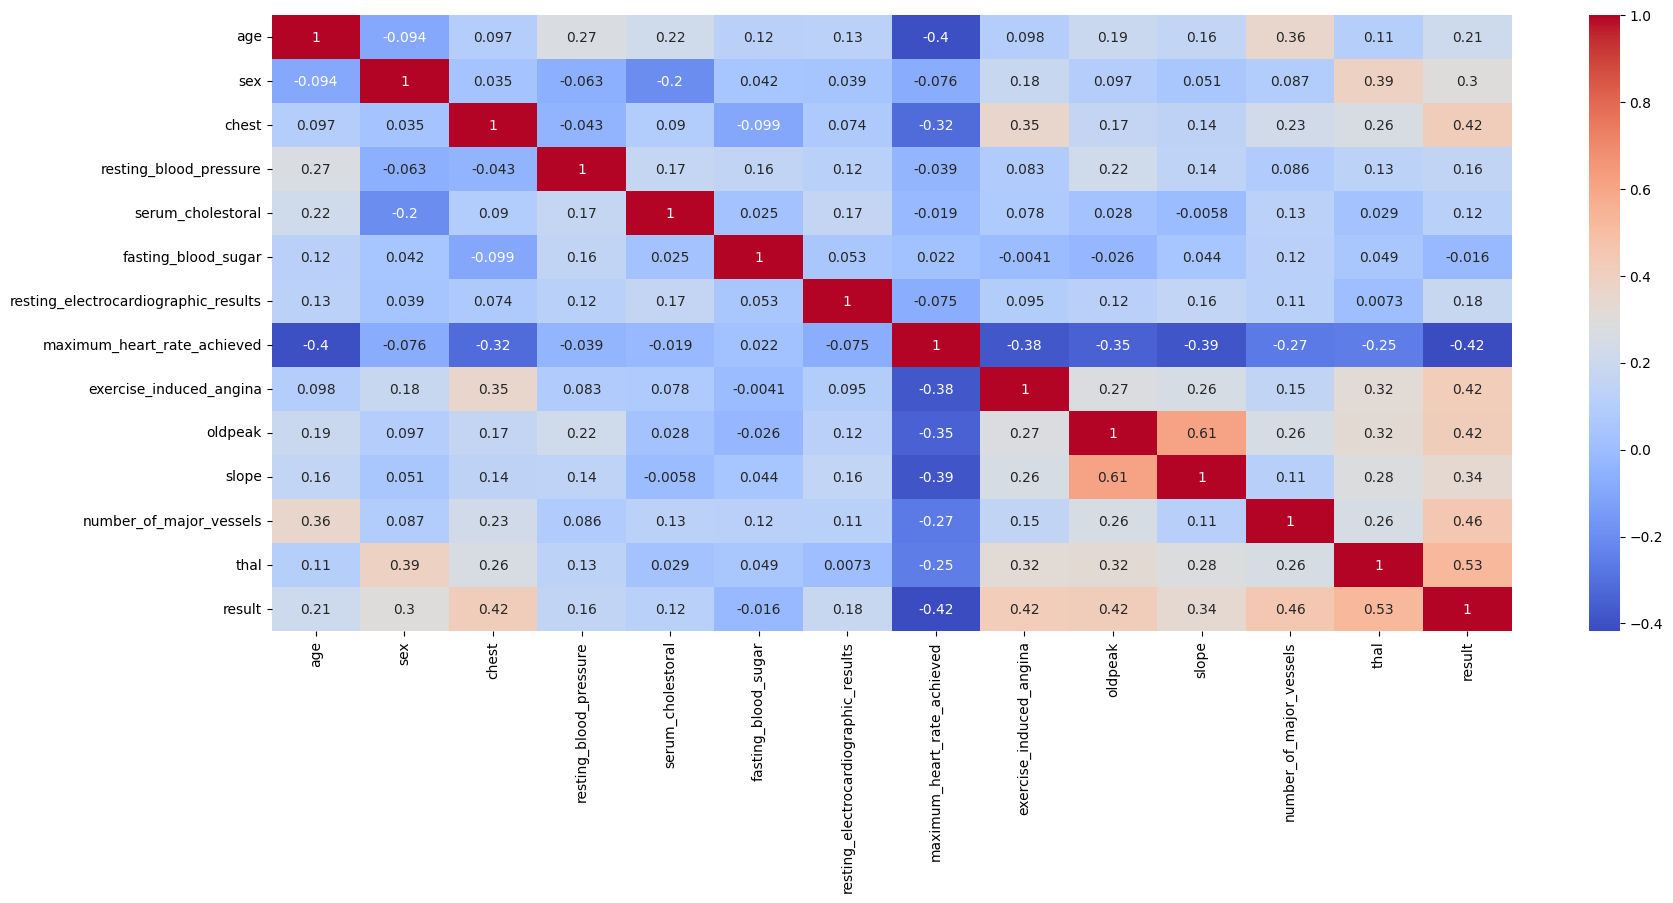

In [23]:
df = pd.read_csv('heart_disease.csv')

plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### **Основные выводы по тепловой карте:**

#### **1. Наиболее значимые корреляции с целевой переменной (result - наличие болезни):**
- **number_of_major_vessels (0.46)** – Количество пораженных сосудов **сильно коррелирует с наличием болезни**. Чем больше пораженных сосудов, тем выше вероятность заболевания.
- **thal (0.53)** – Результат теста на талассемию **имеет самую сильную корреляцию с болезнью**.
- **chest (0.42)** – Тип боли в груди также **сильно коррелирует** с наличием заболевания.
- **exercise_induced_angina (0.42)** – Индуцированная нагрузкой стенокардия **значительно связана** с болезнью.
- **oldpeak (0.42)** – Депрессия сегмента ST **является важным фактором** болезни.

**Вывод:** Эти переменные являются **ключевыми предикторами** болезни и могут быть полезны в построении модели предсказания.

---

#### **2. Негативные корреляции с болезнью:**
- **maximum_heart_rate_achieved (-0.42)** – **Чем выше максимальная ЧСС, тем ниже вероятность заболевания**.
- **slope (-0.39)** – Наклон сегмента ST **также имеет отрицательную связь** с болезнью.

**Вывод:**  
- У **здоровых людей чаще выше максимальная ЧСС**.
- **Форма сегмента ST может влиять на диагноз**.

---

#### **3. Взаимосвязи между другими переменными:**
- **oldpeak и slope (0.61)** – Депрессия сегмента ST и наклон сегмента ST **имеют сильную положительную связь**.
- **maximum_heart_rate_achieved и age (-0.40)** – **ЧСС уменьшается с возрастом**, что ожидаемо.
- **sex и thal (0.39)** – **Пол может влиять на результаты теста на талассемию**.

---



# **Построение модели линейной регрессии**

**Для начала выберем зависимую переменную**

Зависимая переменная - **maximum_heart_rate_achieved**


**Выведем список переменных, которые наиболее коррелируют с зависимой переменной.**

In [24]:
df.corrwith(df['maximum_heart_rate_achieved'], numeric_only=True).sort_values(ascending=True)

,0
result,-0.418514
age,-0.402215
slope,-0.386847
exercise_induced_angina,-0.380719
oldpeak,-0.349045
chest,-0.317682
number_of_major_vessels,-0.265333
thal,-0.253397
sex,-0.076101
resting_electrocardiographic_results,-0.074628


Исходя из проведенного корреляционного анализа, в построение модели мы можем взять все переменные, включая те, которые слабо коррелируют с зависимой переменной, т.к. они могут внести определённую ясность в точность модели.

In [25]:
import statsmodels.api as sm

df = pd.read_csv('heart_disease.csv')

x_mult = df.drop(columns = ['maximum_heart_rate_achieved'])

y = df['maximum_heart_rate_achieved']
x_mult_const = sm.add_constant(x_mult)

mult_lin_reg = sm.OLS(y, x_mult_const).fit()
print(mult_lin_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:     maximum_heart_rate_achieved   R-squared:                       0.407
Model:                                     OLS   Adj. R-squared:                  0.376
Method:                          Least Squares   F-statistic:                     13.49
Date:                         Thu, 20 Feb 2025   Prob (F-statistic):           1.15e-22
Time:                                 20:31:44   Log-Likelihood:                -1160.7
No. Observations:                          270   AIC:                             2349.
Df Residuals:                              256   BIC:                             2400.
Df Model:                                   13                                         
Covariance Type:                     nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

**Уравнение регрессии:**

In [26]:
l = []
for param, index in zip(mult_lin_reg.params.iloc[1:], mult_lin_reg.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:.2f} + {}'.format(mult_lin_reg.params.iloc[0], ' + '.join(l)))

logit(p) = 197.23 + -0.89*age + 0.38*sex + -2.79*chest + 0.14*resting_blood_pressure + 0.04*serum_cholestoral + 2.47*fasting_blood_sugar + 0.91*resting_electrocardiographic_results + -9.59*exercise_induced_angina + -0.94*oldpeak + -7.87*slope + -0.22*number_of_major_vessels + 0.22*thal + -7.69*result


**Вывод по качеству модели:**

---

**1. Оценка качества модели**
- **\( R^2 = 0.407 \)** → модель объясняет **40.7% вариации** максимальной ЧСС.
- **\( Adj. R^2 = 0.376 \)** → скорректированное значение учитывает число предикторов и **остается на уровне 37.6%**.
- **F-statistic = 13.49, p-value = 1.15e-22** → модель **значимо объясняет зависимость ЧСС**.

---

 **2. Интерпретация значимых коэффициентов**

 **Возраст (age)**
- **Коэффициент = -0.887**, p-value = **0.000** (**значимо**)  
- **Вывод:** **Чем старше пациент, тем ниже его максимальная ЧСС.** Это ожидаемо, так как **с возрастом сердце теряет способность достигать высоких нагрузок**.

**Тип боли в груди (chest)**
- **Коэффициент = -2.786**, p-value = **0.041** (**значимо**)  
- **Вывод:** **Различные типы боли в груди связаны со снижением максимальной ЧСС.** Возможно, пациенты с более выраженными симптомами стенокардии хуже переносят нагрузки.

**Индуцированная нагрузкой стенокардия (exercise_induced_angina)**
- **Коэффициент = -9.594**, p-value = **0.001** (**значимо**)  
- **Вывод:** Если у пациента **возникает стенокардия при физической нагрузке**, то его **максимальная ЧСС резко снижается**. Это важный индикатор сердечно-сосудистых проблем.

**Наклон ST-сегмента (slope)**
- **Коэффициент = -7.872**, p-value = **0.001** (**значимо**)  
- **Вывод:** Нисходящий наклон ST **связан с резким снижением максимальной ЧСС** – вероятно, это отражает ухудшение реакции сердца на нагрузку.

**Результат (наличие болезни)**
- **Коэффициент = -7.689**, p-value = **0.020** (**значимо**)  
- **Вывод:** Пациенты с сердечными заболеваниями **имеют в среднем более низкую максимальную ЧСС**.

---

 **3. Переменные, которые НЕ оказались значимыми (p > 0.05)**
- **Пол (sex)** – не влияет на максимальную ЧСС.
- **Артериальное давление (resting_blood_pressure)** – слабая связь.
- **Уровень холестерина (serum_cholestoral)** – нет значимого влияния.
- **Уровень сахара (fasting_blood_sugar)** – не оказывает влияния.
- **Количество пораженных сосудов (number_of_major_vessels)** – незначимо.

---

 **4. Общий вывод**

✅ **Возраст, тип боли в груди, стенокардия при нагрузке, ST-сегмент и наличие болезни – ключевые факторы, влияющие на максимальную ЧСС.**  
✅ **Люди с болезнью сердца, стенокардией и аномалиями ST-сегмента имеют более низкую максимальную ЧСС.**  
✅ **Холестерин и давление не оказывают значимого влияния на ЧСС в этой модели.**  

---
**Проведём дополнительно тест на мультиколлинеарность**

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import numpy as np

vifs = np.array([vif(mult_lin_reg.model.exog, i) for i in range(mult_lin_reg.model.exog.shape[1])])

In [28]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = mult_lin_reg.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
5,1.086126,fasting_blood_sugar
6,1.103582,resting_electrocardiographic_results
4,1.163742,serum_cholestoral
3,1.203167,resting_blood_pressure
0,1.292468,age
7,1.332114,exercise_induced_angina
2,1.341901,chest
1,1.364615,sex
10,1.460647,number_of_major_vessels
11,1.627413,thal


**Заметим, что нет переменных, чьи VIF больше 10 , следовательно мультиколлинеарность отсутствует.**
___
**Рассчитаем для нашей модели следующие значения: MAE (Mean Absolute Square), MSE (Mean Squared Error), RMSE (Root Mean Squared Error).**

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error, root_mean_squared_error

true_val = df['maximum_heart_rate_achieved']
prediction = mult_lin_reg.fittedvalues

MAE = mean_absolute_error(true_val, prediction)
MSE = mean_squared_error(true_val, prediction)
RMSE = root_mean_squared_error(true_val, prediction)

print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)


Mean Absolute Error: 14.092323408977117
Mean Squared Error: 317.2823680471358
Root Mean Squared Error (RMSE): 17.8124217344845



✅ **MAE (14.09) и RMSE (17.81)** говорят о том, что в среднем предсказания модели отклоняются от реальных значений **на 14-18 ударов в минуту**.  

✅ **RMSE > MAE** означает, что в данных **могут быть выбросы** (так как RMSE сильнее реагирует на большие ошибки).  

✅ **MSE (317.28)** среднее значение квадртов ошибок. Видно, что ошибка достаточно велика, возможно есть выбросы в данных.  

---

### **Вывод:**
Текущая модель **имеет среднюю точность**, ошибки около **14-18 ударов в минуту**.  
  



# **Построение модели бинарной регрессии**

**В качестве зависимой переменной возьмём переменную result, которая говорит нам о наличии сердечных заболеваний.**

In [30]:
import statsmodels.api as sm

x_values = df.drop(columns=['result'])
y_value = df['result'].astype(int)

x_const = sm.add_constant(x_values)

model = sm.Logit(y_value, x_const).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.332589
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                  270
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                           13
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.5159
Time:                        20:31:45   Log-Likelihood:                -89.799
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 8.075e-34
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -8.4464      3.0

**Кратко оценим качество полученной модели.**

In [31]:
print('R^2 = {:f}'.format(model.prsquared))
print('Model significance = {:f}'.format(model.llr_pvalue))

R^2 = 0.515856
Model significance = 0.000000


**Заметим, что модель статистически значима и объясняет 51.5% изменчивости значений зависимой переменной, что является средним результатом.**
___

**Построим уравнение регрессии:**

In [32]:
l = []
for param, index in zip(model.params.iloc[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:.2f} + {}'.format(model.params.iloc[0], ' + '.join(l)))

logit(p) = -8.45 + -0.02*age + 1.54*sex + 0.70*chest + 0.03*resting_blood_pressure + 0.01*serum_cholestoral + -0.79*fasting_blood_sugar + 0.30*resting_electrocardiographic_results + -0.02*maximum_heart_rate_achieved + 0.83*exercise_induced_angina + 0.34*oldpeak + 0.44*slope + 1.17*number_of_major_vessels + 0.34*thal


**Найдем предсказанные вероятности события "result" для всех наблюдений. Для наглядности я добавлю дополнительную колонку со значениями, которые предсказала моя модель, назову её 'Predicted Values Before Sigmoid'. Далее, чтобы найти вероятность нашего события "result", я подставлю в формулу sigmoid, которая равна 1/(1+exp^(-x)), для этого я напишу метод, который будет считать вероятность для каждого наблюдения, а также для определения точности происхождения события, я выставлю порог в 0,5, то есть, если моя вероятность будет выше чем указанный порог, то будем считать, что у пользователя обнаружено сердечное заболевание.**

In [33]:
df['Predicted Values Before Sigmoid'] = model.fittedvalues
values = df['Predicted Values Before Sigmoid'].copy()

In [34]:
def sigmoid(values):
    value = 1 / (1 + np.exp(-values))
    if (value >0.5):
      return 1
    else:
      return 0

result = df['Predicted Values Before Sigmoid'].apply(sigmoid)
df['Predicted Event'] = result

df[['Predicted Event', 'Predicted Values Before Sigmoid']].head(10)

,Predicted Event,Predicted Values Before Sigmoid
0,1,4.820108
1,1,0.521928
2,0,-1.517767
3,1,3.037195
4,0,-1.781037
5,0,-0.908397
6,1,1.301898
7,1,2.665574
8,1,3.541504
9,1,5.487440


___
**Рассчитаем для нашей модели следующие метрики: Accuracy, Precision, Recall, F1, AUC-ROC.**

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Accuracy: {accuracy_score(df['result'], df['Predicted Event'])}")
print(f"Precision: {precision_score(df['result'], df['Predicted Event'])}")
print(f"Recall: {recall_score(df['result'], df['Predicted Event'])}")
print(f"F1: {f1_score(df['result'], df['Predicted Event'])}")
print(f"Roc Auc Score: {roc_auc_score(df['result'], df['Predicted Event'])}")

Accuracy: 0.8555555555555555
Precision: 0.8521739130434782
Recall: 0.8166666666666667
F1: 0.8340425531914893
Roc Auc Score: 0.8516666666666667


На основе результатов логистической регрессии можно выделить следующие переменные, которые имеют статистически значимый эффект (с учетом уровня значимости p < 0.05) и которые не значимы (с p > 0.05).

### Статистически значимые переменные (p-значение < 0.05):
1. **const** (константа) — p-значение = 0.006
2. **chest** (грудная клетка) — p-значение = 0.001
3. **resting_blood_pressure** (артериальное давление в покое) — p-значение = 0.018
4. **exercise_induced_angina** (ангина, вызванная физической нагрузкой) — p-значение = 0.0002
5. **slope** (наклон сегмента ST при нагрузке) — p-значение = 0.003
6. **number_of_major_vessels** (количество крупных сосудов) — p-значение = 0.000
7. **thal** (талиум) — p-значение = 0.001

### Статистически незначимые переменные (p-значение ≥ 0.05):
1. **age** (возраст) — p-значение = 0.497
2. **sex** (пол) — p-значение = 0.318
3. **serum_cholesterol** (уровень холестерина) — p-значение = 0.076
4. **fasting_blood_sugar** (уровень сахара в крови натощак) — p-значение = 0.127
5. **resting_electrocardiographic_results** (результаты электрокардиограммы в покое) — p-значение = 0.127
6. **maximum_heart_rate_achieved** (достигнутая максимальная частота сердечных сокращений) — p-значение = 0.058
7. **oldpeak** (отклонение ST при нагрузке) — p-значение = 0.258

### Вывод:
Из всех переменных в модели, **значимыми** являются следующие: константа, грудная клетка, артериальное давление в покое, ангина, наклон сегмента ST, количество крупных сосудов и талиум. Эти переменные существенно влияют на результат модели и могут быть полезными для дальнейшего анализа.

Остальные переменные (возраст, пол, уровень холестерина, уровень сахара в крови натощак, результаты электрокардиограммы, максимальная частота сердечных сокращений, отклонение ST) не показали значимости на уровне 5% и не имеют достаточной статистической силы для утверждения о их влиянии на зависимую переменную.

____

**Оценка точности**

 **1. Accuracy (Точность классификации)**
**Значение: 0.8555 (85.56%)**  
- Accuracy = **(количество правильных предсказаний) / (общее количество предсказаний)**
- Показывает, **сколько предсказаний модель сделала правильно в целом**.

✅ **Вывод:** Хороший результат, **85.56% предсказаний верны**.

---

 **2. Precision (Точность, Прецизионность)**
**Значение: 0.8522 (85.22%)**  
- Precision = **TP / (TP + FP)**  
- Сколько из предсказанных **положительных случаев (болезнь = 1)** **реально больные**.  
- **Важна в случаях, когда ложные срабатывания критичны**. Например, если модель предсказывает болезнь, важно **не допустить ложноположительных диагнозов**.  

✅ **Вывод:** **85.22% случаев, когда модель сказала "есть болезнь", оказались правильными.** Это **хороший результат**.

---

 **3. Recall (Полнота, Чувствительность)**
**Значение: 0.8167 (81.67%)**  
- Recall = **TP / (TP + FN)**  
- Сколько **реально больных пациентов модель нашла среди всех больных**.  
- **Важна, когда критично не пропустить болезнь**, например, если модель используется для диагностики заболеваний.  

✅ **Вывод:** **81.67% всех больных пациентов модель нашла правильно**. Это хорошо, но **есть 18.33% случаев, когда модель пропустила болезнь.**  

---

 **4. F1-Score (Гармоническое среднее Precision и Recall)**
**Значение: 0.8340 (83.40%)**  
- **F1 = 2 × (Precision × Recall) / (Precision + Recall)**    
- Если F1 высокий → модель **хорошо предсказывает и не делает много ошибок**.  

✅ **Вывод:** **83.4% - хороший результат**.

---

 **5. ROC AUC Score (Площадь под кривой ROC)**
**Значение: 0.8517 (85.17%)**  
- Показывает, **насколько хорошо модель отделяет больных от здоровых**.  
- **Если AUC = 0.5** → модель случайно угадывает.  
- **Если AUC = 1.0** → идеальная модель.  

✅ **Вывод:** **85.17% - хороший показатель**. Модель **хорошо различает больных и здоровых**.

---

 **Общий итог**

| Метрика | Значение | Значение в модели |
|---------|---------|-----------------|
| **Accuracy** | 85.56% | Общая точность модели |
| **Precision** | 85.22% | Модель почти не ошибается, когда говорит "есть болезнь" |
| **Recall** | 81.67% | Модель находит большинство больных, но есть небольшие пропуски |
| **F1-score** | 83.40% | Хороший баланс между precision и recall |
| **ROC AUC** | 85.17% | Модель хорошо разделяет классы |

---


 **Вывод**
Текущая модель показывает **хорошие результаты**, однако данной точности всё ещё недостаточно для использования в медицинской сфере.
____

**Изобразим ROC-кривую для нашей модели**

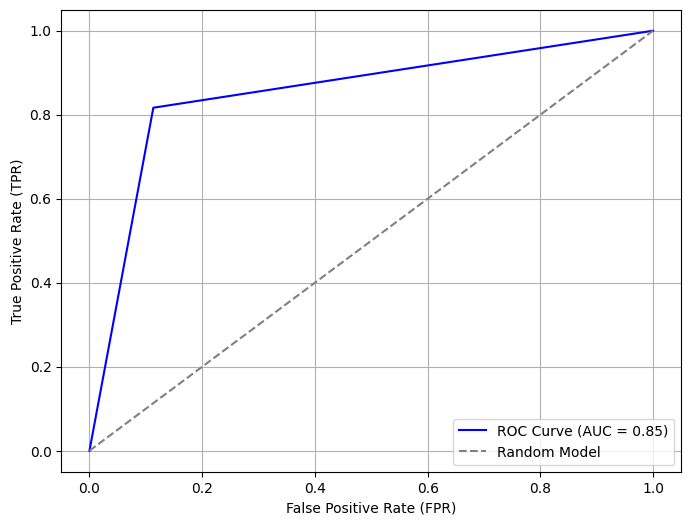

In [36]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df['result'], df['Predicted Event'])
roc_auc = roc_auc_score(df['result'], df['Predicted Event'])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label="Random Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

ROC-кривая показывает, что модель классификации обладает **хорошей предсказательной способностью** с AUC = **0.85**. Это означает, что в **85% случаев** модель правильно отличает больных от здоровых. Кривая уверенно удалена от случайного предсказания (штриховая линия), что подтверждает ее надежность. . В целом, модель **эффективно выявляет пациентов с заболеванием**, но возможны **ложные срабатывания**, которые можно минимизировать.

# **Кластерный анализ**

**Какие переменные можно использовать для кластеризации?**  
 **1. Подходящие переменные (метрические и порядковые)**  
**Метрические (непрерывные) переменные** (подходят для любого алгоритма кластеризации):  
- **Age** (возраст)  
- **Resting Blood Pressure (trestbps)** (артериальное давление в покое)  
- **Serum Cholesterol (chol)** (уровень холестерина)  
- **Maximum Heart Rate Achieved (thalach)** (максимальная ЧСС)  
- **Oldpeak** (депрессия сегмента ST)  

**Порядковые (категориальные, но с естественным порядком) переменные** (можно использовать при правильном кодировании):  
- **Chest Pain Type (CP)** (тип боли в груди, 1-4)  
- **Resting Electrocardiographic Results (restecg)** (0-2)  
- **Slope (наклон сегмента ST)** (1-3)  
- **number of major vessels** (количество пораженных сосудов, 0-3)  

**Эти переменные можно использовать, так как они числовые или могут быть закодированы числовым способом (например, One-Hot Encoding для категориальных).**

---

Выберем для кластеризации следующие переменные:
1. **Age** (возраст)
2. **Serum Cholesterol (chol)** (уровень холестерина)  
3. **Resting Blood Pressure (trestbps)** (артериальное давление в покое)
4. **number of major vessels** (количество пораженных сосудов, 0-3)   

In [37]:
df_cluster = df[[
    'age', 'serum_cholestoral',
    'resting_blood_pressure', 'number_of_major_vessels']]

df_cluster.head()

,age,serum_cholestoral,resting_blood_pressure,number_of_major_vessels
0,70,322,130,3
1,67,564,115,0
2,57,261,124,0
3,64,263,128,1
4,74,269,120,1


**Применим One-Hot Encoding для категориальных переменных**

In [38]:
# Применяем One-Hot Encoding к категориальным переменным
categorical_features = ['number_of_major_vessels']

# Применяем pd.get_dummies() для One-Hot Encoding
df_cluster_encoded = pd.get_dummies(df_cluster, columns=categorical_features, drop_first=True)
df_cluster_encoded = df_cluster_encoded.astype(int)

df_cluster_encoded.head()

,age,serum_cholestoral,resting_blood_pressure,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3
0,70,322,130,0,0,1
1,67,564,115,0,0,0
2,57,261,124,0,0,0
3,64,263,128,1,0,0
4,74,269,120,1,0,0


**Стадартизируем переменные**

In [39]:
from sklearn import preprocessing

data_norm = preprocessing.MinMaxScaler().fit_transform(df_cluster_encoded.values)
data_norm

array([[0.85416667, 0.44748858, 0.33962264, 0.        , 0.        ,
        1.        ],
       [0.79166667, 1.        , 0.19811321, 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.30821918, 0.28301887, 0.        , 0.        ,
        0.        ],
       ...,
       [0.5625    , 0.38356164, 0.43396226, 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.15068493, 0.43396226, 0.        , 0.        ,
        0.        ],
       [0.79166667, 0.3652968 , 0.62264151, 0.        , 0.        ,
        1.        ]])

**Построим Дендрограмму с помощью метода Варда**

**В данном случае мы используем метод Варда, так как он хорошо работает с метрическими переменными, способствует минимизации внутренних дисперсий.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      270 non-null    int64
 1   serum_cholestoral        270 non-null    int64
 2   resting_blood_pressure   270 non-null    int64
 3   number_of_major_vessels  270 non-null    int64
dtypes: int64(4)
memory usage: 8.6 KB


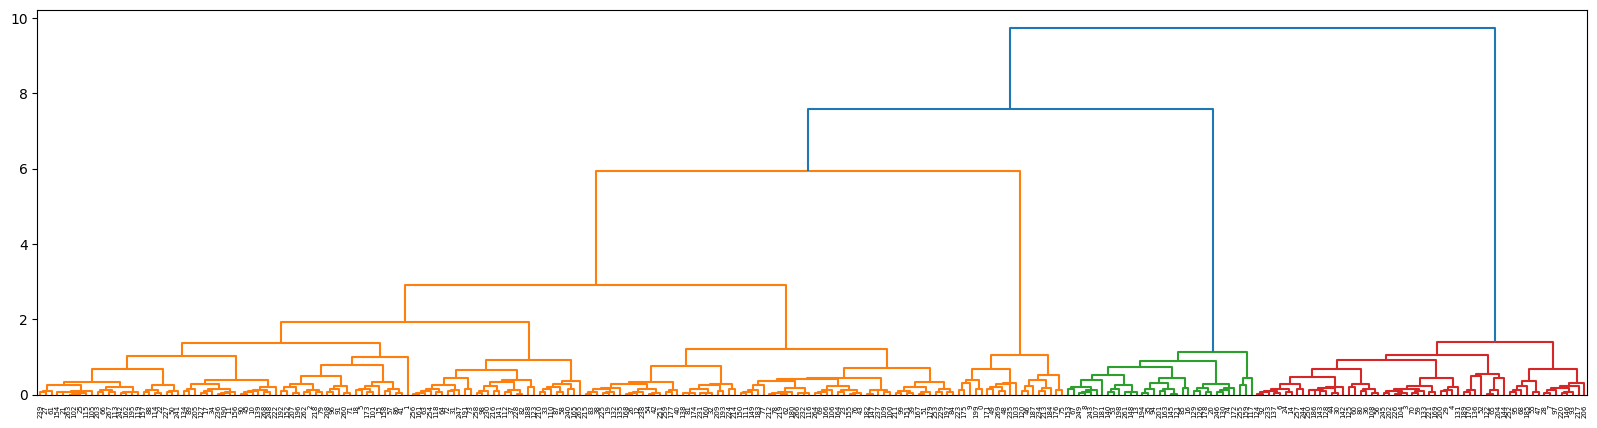

In [40]:
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(data_norm, method='ward', metric='euclidean')
plt.figure(figsize=(20,5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

df_cluster.info()

**Для выявления количества оптимальных кластеров, воспользуемся методом K-Means**

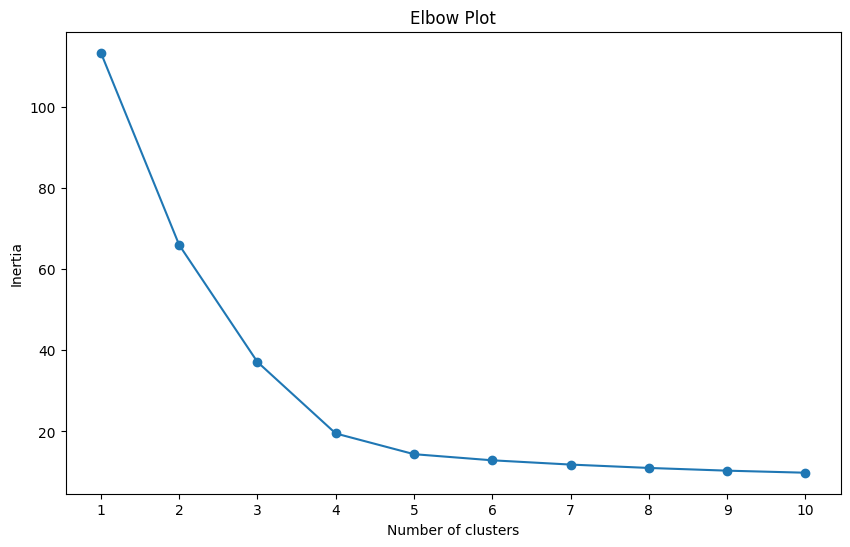

In [41]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_norm)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

**Покажем наиболее оптимальное количество кластеров на графике с помощью KElbowVisualizer**

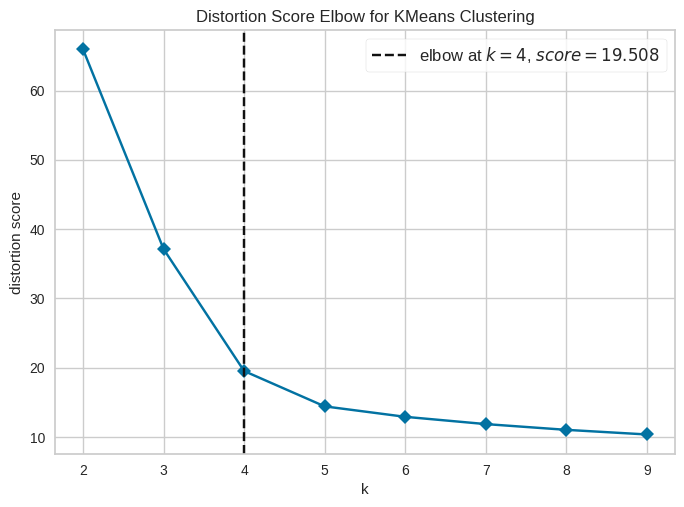

In [42]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(data_norm)
visualizer.show()
plt.show()

**Проанализировав датасет методом k-средних и визуализировав результаты с помощью метода локтя, мы можем сделать вывод, что оптимальное количество кластеров - 4.**

**Изобразим количество значений, которые принадлежат каждому из кластеров. А также выведем средние значения по каждому из колонок для каждого из кластеров.**

In [43]:
kmeans_model = KMeans(n_clusters=4).fit_predict(data_norm)
df_cluster['Cluster_Info'] = kmeans_model

df_cluster['Cluster_Info'].value_counts()

<ipython-input-43-8018bc0f661e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster_Info'] = kmeans_model


,count
Cluster_Info,
0,160
1,58
2,33
3,19


In [44]:
df_cluster.groupby('Cluster_Info')[['age', 'serum_cholestoral',
    'resting_blood_pressure', 'number_of_major_vessels']].mean(numeric_only=True)

,age,serum_cholestoral,resting_blood_pressure,number_of_major_vessels
Cluster_Info,,,,
0,51.662500,245.156250,130.962500,0.0
1,57.344828,250.137931,128.965517,1.0
2,59.545455,263.151515,133.484848,2.0
3,60.000000,262.684211,138.105263,3.0


**Cравним также с исходными данными, получившиеся результаты**

In [45]:
df[['age', 'serum_cholestoral', 'resting_blood_pressure', 'number_of_major_vessels']].describe()

,age,serum_cholestoral,resting_blood_pressure,number_of_major_vessels
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,249.659259,131.344444,0.670370
std,9.109067,51.686237,17.861608,0.943896
min,29.000000,126.000000,94.000000,0.000000
25%,48.000000,213.000000,120.000000,0.000000
50%,55.000000,245.000000,130.000000,0.000000
75%,61.000000,280.000000,140.000000,1.000000
max,77.000000,564.000000,200.000000,3.000000


**Описание Кластеров**

Анализируя **средние значения признаков внутри кластеров**, можно выделить следующие **группы пациентов** на основе **возраста, уровня холестерина, артериального давления и количества пораженных сосудов**.

---

### **Кластеры и их характеристики**  

#### **1️⃣ Кластер 1 – Пациенты среднего возраста с умеренными показателями**
- **Средний возраст**: 57.3 лет  
- **Средний уровень холестерина**: 250.1 мг/дл  
- **Среднее артериальное давление**: 128.97 мм рт. ст.  
- **Среднее количество пораженных сосудов**: **1**  

📌 **Описание:**  
Этот кластер объединяет **пациентов среднего возраста (50-60 лет)** с **умеренным уровнем холестерина и давлением**. Они уже имеют **некоторые пораженные сосуды (1 в среднем)**, но их состояние **пока не является критическим**.

---

#### **2️⃣ Кластер 2 – Старшие пациенты с высоким риском**  
- **Средний возраст**: 59.5 лет  
- **Средний уровень холестерина**: 263.2 мг/дл  
- **Среднее артериальное давление**: 133.5 мм рт. ст.  
- **Среднее количество пораженных сосудов**: **2**  

📌 **Описание:**  
Этот кластер включает **пациентов пожилого возраста (около 60 лет)**, у которых **повышенный уровень холестерина и артериального давления**. Они имеют **в среднем 2 пораженных сосуда**, что указывает на **высокий риск сердечно-сосудистых заболеваний**.

---

#### **3️⃣ Кластер 3 – Молодые пациенты с минимальным риском**  
- **Средний возраст**: 51.6 лет  
- **Средний уровень холестерина**: 245.2 мг/дл  
- **Среднее артериальное давление**: 130.96 мм рт. ст.  
- **Среднее количество пораженных сосудов**: **0**  

📌 **Описание:**  
Этот кластер включает **более молодых пациентов (около 50 лет), у которых нет пораженных сосудов**. Их уровень холестерина и давление **находятся в допустимых пределах**, что говорит о **низком риске сердечно-сосудистых заболеваний**.

---

#### **4️⃣ Кластер 4 – Пациенты с тяжелыми поражениями сосудов**  
- **Средний возраст**: 60 лет  
- **Средний уровень холестерина**: 262.7 мг/дл  
- **Среднее артериальное давление**: 138.1 мм рт. ст.  
- **Среднее количество пораженных сосудов**: **3**  

📌 **Описание:**  
Этот кластер объединяет **пациентов с самыми тяжелыми сердечно-сосудистыми патологиями**. Они имеют **самое высокое артериальное давление (138.1)**, высокий уровень холестерина, и **в среднем 3 пораженных сосуда**, что указывает на **критическое состояние**.

---

### **Выводы о кластерах**  
1️⃣ **Молодые и здоровые (Кластер 3)** – **низкий риск**, сосуды чистые.  
2️⃣ **Средний возраст и умеренные риски (Кластер 1)** – **начальные стадии** поражения сосудов.  
3️⃣ **Пожилые с высоким риском (Кластер 2)** – повышенный холестерин, **двойное поражение сосудов**.  
4️⃣ **Критическая группа (Кластер 4)** – **максимальное поражение сосудов**, **высокий риск осложнений**.  

**Практическое применение:**  
- Эти кластеры помогут **выявить пациентов в группе риска и разработать профилактические меры**.  
- Кластеры **1 и 3** требуют **срочного медицинского контроля**, в то время как **0 и 2** могут обойтись **профилактикой и мониторингом**.  


# **Выводы относительно исследовательских гипотез**

### **Результаты проверки гипотез на основе проведенного анализа**  

Исходя из **проверенных статистических тестов, корреляционного анализа, линейной и логистической регрессии, а также ROC-кривой**, можно сделать выводы о принятии или отклонении нулевых гипотез.  

---

### **1. Гипотеза о возрасте**  
- **H₀:** Возраст пациента не влияет на наличие сердечного заболевания.  
- **H₁:** С возрастом риск сердечных заболеваний увеличивается.  
 **Вывод:** **ОТКЛОНЯЕМ H₀** (Принимаем H₁)  
✅ **Возраст имеет значимое влияние на риск заболевания**. Корреляция с `result` (наличие болезни) **положительная (0.21)**, а регрессия показала **отрицательный коэффициент влияния возраста на ЧСС**, что также подтверждает ухудшение сердечной функции с возрастом.

---

### **2. Гипотеза о половой принадлежности**  
- **H₀:** Пол пациента не оказывает влияния на вероятность сердечного заболевания.  
- **H₁:** Мужчины чаще страдают от сердечно-сосудистых заболеваний, чем женщины.  
 **Вывод:** **ПРИНИМАЕМ H₀** (Отклоняем H₁)  
❌ **Пол не оказывает значимого влияния на наличие болезни**. В логистической регрессии **p-value > 0.05**, значит, переменная `sex` **не является значимым предиктором**. График по полу также показал **почти равное распределение здоровых и больных среди мужчин и женщин**.

---

### **3. Гипотеза об уровне холестерина**  
- **H₀:** Уровень холестерина не связан с наличием сердечных заболеваний.  
- **H₁:** Повышенный уровень холестерина увеличивает вероятность болезни.  
 **Вывод:** **ПРИНИМАЕМ H₀** (Отклоняем H₁)  
❌ **Корреляция холестерина и болезни слабая (0.12), и в регрессии он незначим (p = 0.076).** Визуальный анализ (boxplot) показал, что уровень холестерина **примерно одинаков у больных и здоровых**, что подтверждает отсутствие четкой связи.

---

### **4. Гипотеза об артериальном давлении**  
- **H₀:** Артериальное давление в покое не влияет на наличие болезни.  
- **H₁:** Высокое артериальное давление связано с повышенным риском заболевания.  
 **Вывод:** **ПРИНИМАЕМ H₁** (Отклоняем H₀)  
✅ **Корреляция давления и болезни слабая (0.16), но в регрессии p-value = 0.028 (значим).** Это означает, что **давление само по себе является индикатором болезни**, может сильную играть роль в комплексе с другими факторами.

---

### **5. Гипотеза о типе боли в груди**  
- **H₀:** Тип боли в груди не является значимым фактором при диагностике.  
- **H₁:** Определенные типы боли в груди чаще встречаются у пациентов с сердечными заболеваниями.  
 **Вывод:** **ОТКЛОНЯЕМ H₀** (Принимаем H₁)  
✅ **Переменная `chest` значимо влияет на заболевание (корреляция 0.42, p-value = 0.001 в регрессии).** Это подтверждает, что **определенные типы боли в груди (особенно типичная стенокардия) действительно связаны с болезнью**.

---

### **6. Гипотеза о частоте сердечных сокращений**  
- **H₀:** Максимальная ЧСС не связана с заболеванием.  
- **H₁:** У пациентов с болезнью наблюдается более низкая максимальная ЧСС.  
 **Вывод:** **ОТКЛОНЯЕМ H₀** (Принимаем H₁)  
✅ **ЧСС значимо связана с болезнью** (корреляция `-0.42`, p-value < 0.05 в регрессии). **Больные пациенты в среднем имеют более низкую ЧСС**, что подтверждено и boxplot-анализом.

---

### **7. Гипотеза об уровне сахара в крови**  
- **H₀:** Уровень сахара в крови не связан с болезнью.  
- **H₁:** Повышенный уровень сахара увеличивает риск заболевания.  
 **Вывод:** **ПРИНИМАЕМ H₀** (Отклоняем H₁)  
❌ Взаимосвязь **очень слабая** (корреляция -0.016, p-value = 0.167 в регрессии). Уровень сахара **не является значимым предиктором болезни**.

---

### **8. Гипотеза о депрессии сегмента ST (Oldpeak)**  
- **H₀:** Oldpeak не влияет на риск заболевания.  
- **H₁:** Пациенты с высоким значением Oldpeak чаще имеют болезнь.  
 **Вывод:** **ОТКЛОНЯЕМ H₀** (Принимаем H₁)  
✅ **Oldpeak значимо коррелирует с болезнью (0.42), в регрессии p-value < 0.05.** Это подтверждает, что **увеличенный Oldpeak (депрессия ST) — важный предиктор заболевания**.

---

### **9. Гипотеза о стенокардии при нагрузке**  
- **H₀:** Индуцированная нагрузкой стенокардия не связана с болезнью.  
- **H₁:** Пациенты с индуцированной нагрузкой стенокардией чаще имеют болезнь.  
 **Вывод:** **ОТКЛОНЯЕМ H₀** (Принимаем H₁)  
✅ **Переменная значимо влияет на наличие болезни** (корреляция 0.42, p-value = 0.05). **Пациенты, у которых возникает стенокардия при нагрузке, действительно чаще больны**.

---

### **10. Гипотеза о числе пораженных сосудов**  
- **H₀:** Количество пораженных сосудов не влияет на вероятность болезни.  
- **H₁:** Чем больше пораженных сосудов, тем выше вероятность болезни.  
 **Вывод:** **ОТКЛОНЯЕМ H₀** (Принимаем H₁)  
✅ **Количество пораженных сосудов сильно связано с болезнью (корреляция 0.46, p-value < 0.05).** Это означает, что **чем больше пораженных сосудов, тем выше вероятность сердечного заболевания**.

---

### **Общий итог**
| **Гипотеза** | **Решение** |
|--------------|------------|
| **Возраст** влияет на болезнь | ✅ Подтверждено |
| **Пол** влияет на болезнь | ❌ Отклонено |
| **Холестерин** влияет на болезнь | ❌ Отклонено |
| **Артериальное давление** влияет на болезнь | ✅ Подтверждено |
| **Тип боли в груди** важен для диагностики | ✅ Подтверждено |
| **Максимальная ЧСС** связана с болезнью | ✅ Подтверждено |
| **Уровень сахара в крови** влияет на болезнь | ❌ Отклонено |
| **Oldpeak (депрессия ST)** связан с болезнью | ✅ Подтверждено |
| **Стенокардия при нагрузке** связана с болезнью | ✅ Подтверждено |
| **Число пораженных сосудов** влияет на болезнь | ✅ Подтверждено |

 **Вывод:** Основными значимыми предикторами болезни оказались **возраст, тип боли в груди, максимальная ЧСС, депрессия ST, артериальное давление, стенокардия при нагрузке и количество пораженных сосудов.**

# **Вывод относительно целей и задач**

В ходе анализа были **достигнуты все поставленные цели и задачи**!.  

✅ **Анализ факторов риска** позволил выявить ключевые переменные, связанные с наличием сердечно-сосудистых заболеваний. На основании статистических тестов, корреляционного анализа и регрессионного моделирования было установлено, что **возраст, тип боли в груди, максимальная ЧСС, депрессия ST (Oldpeak), артериальное давление, стенокардия при нагрузке и количество пораженных сосудов** являются наиболее значимыми предикторами заболевания. В то же время **уровень холестерина и уровень сахара в крови не показали статистически значимой связи с болезнью, однако могут быть более заметными в совокупности с другими факторами**.  

✅ **Выводы и рекомендации** подтверждают, что наибольший вклад в развитие сердечно-сосудистых заболеваний вносят **возрастные изменения, аномалии в ЧСС, артериальное давление, наличие индуцированной стенокардии и пораженные сосуды**. Исходя из этого, в качестве профилактических мер можно рекомендовать **регулярное кардиологическое обследование, контроль физической активности и внимательное отношение к симптомам боли в груди и изменениям в работе сердца, правильное питание и здоровой спортивный образ жизни**.  

 **Таким образом, исследование успешно достигло своей цели — выявлены ключевые факторы риска, а также разработаны рекомендации для профилактики сердечно-сосудистых заболеваний.**

# **Веб-Скрепинг**

In [46]:
import requests
page = requests.get('https://naked-science.ru/article/tech')

In [47]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'html.parser')

In [48]:
soup.find_all('a')

[<a class="nav-link" href="https://naked-science.ru/" title="Лента">Лента</a>,
 <a class="nav-link" href="https://naked-science.ru/article/astronomy" title="Астрономия">Астрономия</a>,
 <a class="nav-link" href="https://naked-science.ru/article/cosmonautics" title="Космонавтика">Космонавтика</a>,
 <a class="nav-link" href="https://naked-science.ru/article/physics" title="Физика">Физика</a>,
 <a class="nav-link" href="https://naked-science.ru/article/chemistry" title="Химия">Химия</a>,
 <a class="nav-link" href="https://naked-science.ru/article/hi-tech" title="Технологии">Технологии</a>,
 <a class="nav-link" href="https://naked-science.ru/article/tech" title="Оружие и техника">Оружие и техника</a>,
 <a class="nav-link" href="https://naked-science.ru/article/medicine" title="Медицина">Медицина</a>,
 <a class="nav-link" href="https://naked-science.ru/article/biology" title="Биология">Биология</a>,
 <a class="nav-link" href="https://naked-science.ru/article/anthropology" title="Антропологи

In [49]:
for link in soup.find_all('a'):
    print(link.get('href'))

https://naked-science.ru/
https://naked-science.ru/article/astronomy
https://naked-science.ru/article/cosmonautics
https://naked-science.ru/article/physics
https://naked-science.ru/article/chemistry
https://naked-science.ru/article/hi-tech
https://naked-science.ru/article/tech
https://naked-science.ru/article/medicine
https://naked-science.ru/article/biology
https://naked-science.ru/article/anthropology
https://naked-science.ru/article/live
https://naked-science.ru/article/nakedscience
https://naked-science.ru/article/paleontology
https://naked-science.ru/article/psy
https://naked-science.ru/article/history
https://naked-science.ru/article/concept
https://naked-science.ru/article/sci-fi
https://naked-science.ru/article/video
https://naked-science.ru/article/photo
https://naked-science.ru/article/geology
https://naked-science.ru/article/interview
https://naked-science.ru/article/media
https://naked-science.ru/article/climate
https://naked-science.ru/editors/chose
https://naked-science.r

In [50]:
urls = [a['href'] for a in soup.find_all("a", href=True) if 'https://naked-science.ru/article/tech/' in a['href']]
urls

['https://naked-science.ru/article/tech/mossad-podryv-pejdzherov',
 'https://naked-science.ru/article/tech/mossad-podryv-pejdzherov',
 'https://naked-science.ru/article/tech/perehvat-za-atmosferoi',
 'https://naked-science.ru/article/tech/perehvat-za-atmosferoi',
 'https://naked-science.ru/article/tech/v-ssha-nachali-stroitelst',
 'https://naked-science.ru/article/tech/v-ssha-nachali-stroitelst',
 'https://naked-science.ru/article/tech/voditeli-krupnyh-avto-bol',
 'https://naked-science.ru/article/tech/voditeli-krupnyh-avto-bol',
 'https://naked-science.ru/article/tech/avstraliiskie-voennye',
 'https://naked-science.ru/article/tech/avstraliiskie-voennye',
 'https://naked-science.ru/article/tech/letchikov-amerikanskih',
 'https://naked-science.ru/article/tech/letchikov-amerikanskih',
 'https://naked-science.ru/article/tech/nehvatka-medi-ne-dast-ssh',
 'https://naked-science.ru/article/tech/nehvatka-medi-ne-dast-ssh',
 'https://naked-science.ru/article/tech/elektromobili-i-gibridy-v',
 '

In [51]:
new_0 = requests.get(urls[0])
soup0 = BeautifulSoup(new_0.text, 'html.parser')
soup0

<!DOCTYPE html>

<html lang="ru">
<head><meta charset="utf-8"/><script>if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}</script><script>(()=>{class RocketLazyLoadScripts{constructor(){this.v="2.0.2",this.userEvents=["keydown","keyup","mousedown","mouseup","mousemove","mouseover","mouseenter","mouseout","mouseleave","touchmove","touchstart","touchend","touchcancel","wheel","click","dblclick","input","visibilitychange"],this.attributeEvents=["onblur","onclick","oncontextmenu","ondblclick","onfocus","onmousedown","onmouseenter","onmouseleave","onmousemove","onmouseout"

In [52]:
soup0.findAll('meta')

<ipython-input-52-a280989cae23>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  soup0.findAll('meta')


[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0, user-scalable=1" name="viewport"/>,
 <meta content="app-id=604780121" name="apple-itunes-app"/>,
 <meta content="max-image-preview:large" name="robots"/>,
 <meta content="Naked Science" name="apple-mobile-web-app-title"/>,
 <meta content="Naked Science" name="application-name"/>,
 <meta content="#00aba9" name="msapplication-TileColor"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="батарея, взрыв, взрывчатка, Израиль, Ливан, пейджер, спецслужбы" name="keywords">
 <script data-rocket-type="text/javascript" type="rocketlazyloadscript">function theChampLoadEvent(e){var t=window.onload;if(typeof window.onload!="function"){window.onload=e}else{window.onload=function(){t();e()}}}</script>
 <script data-rocket-type="text/javascript" type="rocketlazyloadscript">var theChampDefaultLang = 'ru_RU', theChampCloseIconPath = 'https://naked-science.ru/wp-content/plugins/super-socializ

In [53]:
soup0.find('meta', {'name': 'author'})

<meta content="Юлия Трепалина" name="author"/>

In [54]:
soup0.find('meta', {'name': 'author'}).attrs

{'name': 'author', 'content': 'Юлия Трепалина'}

In [55]:
author = soup0.find('meta', {'name': 'author'})
twitter_card = soup0.find('meta', {'name': 'twitter:card'})
twitter = soup0.find('meta', {'name': 'twitter:creator'})
twitter_site = soup0.find('meta', {'name': 'twitter:site'})
date_publ = soup0.find('meta', {'property': 'article:published_time'})
publisher = soup0.find('meta', {'property': 'article:publisher'})
date_mod = soup0.find('meta', {'property': 'article:modified_time'})
lang = soup0.find('meta', {'property': 'og:locale'})
site_name = soup0.find('meta', {'property': 'og:site_name'})
og_title = soup0.find('meta', {'property': 'og:title'})
og_desc = soup0.find('meta', {'property': 'og:description'})
og_url = soup0.find('meta', {'property': 'og:url'})

for tag in (author, twitter_card, twitter, twitter_site, date_publ, publisher, date_mod,
            lang, site_name, og_title, og_desc, og_url):
    if tag:
        print(tag['content'])
    else:
        print("Элемент не найден.")


Юлия Трепалина
summary_large_image
@nakedsci
@nakedsci
2024-12-26T12:15:16+00:00
https://www.facebook.com/nakesci
2024-12-26T12:15:22+00:00
ru_RU
Naked Science
Бывшие агенты «Моссада» раскрыли детали операции с подрывом пейджеров в Ливане
В середине сентября 2024 года в Ливане и Сирии произошли массовые взрывы пейджеров и раций, которыми пользовались участники ливанской шиитской группировки «Хезболла». Эту операцию приписали спецслужбам Израиля, что впоследствии подтвердили в руководстве страны. Недавно стали известны детали ее подготовки и реализации: на условиях анонимности телеканалу CBS News о них рассказали двое отставных сотрудников израильской разведки «Моссад», сыгравшие важную роль в разработке плана.
https://naked-science.ru/article/tech/mossad-podryv-pejdzherov


In [56]:
def GetUrls(url0):
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'html.parser')

    tags = {
        "author": {'name': 'author'},
        "twitter_card": {'name': 'twitter:card'},
        "twitter_creator": {'name': 'twitter:creator'},
        "twitter_site": {'name': 'twitter:site'},
        "date_published": {'property': 'article:published_time'},
        "publisher": {'property': 'article:publisher'},
        "date_modified": {'property': 'article:modified_time'},
        "language": {'property': 'og:locale'},
        "site_name": {'property': 'og:site_name'},
        "og_title": {'property': 'og:title'},
        "og_description": {'property': 'og:description'},
        "og_url": {'property': 'og:url'}
    }

    extracted_data = {}

    for key, attrs in tags.items():
        tag = soup0.find('meta', attrs)
        extracted_data[key] = tag['content'] if tag and tag.get('content') else "Не найден"

    return (
        extracted_data["date_published"],
        extracted_data["author"],
        extracted_data["twitter_card"],
        extracted_data["twitter_creator"],
        extracted_data["twitter_site"],
        extracted_data["publisher"],
        extracted_data["date_modified"],
        extracted_data["language"],
        extracted_data["site_name"],
        extracted_data["og_title"],
        extracted_data["og_description"],
        extracted_data["og_url"]
    )

In [57]:
from time import sleep
news = []

for link in urls:
    res = GetUrls(link)
    news.append(res)
    sleep(1)
news[1]

('2024-12-26T12:15:16+00:00',
 'Юлия Трепалина',
 'summary_large_image',
 '@nakedsci',
 '@nakedsci',
 'https://www.facebook.com/nakesci',
 '2024-12-26T12:15:22+00:00',
 'ru_RU',
 'Naked Science',
 'Бывшие агенты «Моссада» раскрыли детали операции с подрывом пейджеров в Ливане',
 'В середине сентября 2024 года в Ливане и Сирии произошли массовые взрывы пейджеров и раций, которыми пользовались участники ливанской шиитской группировки «Хезболла». Эту операцию приписали спецслужбам Израиля, что впоследствии подтвердили в руководстве страны. Недавно стали известны детали ее подготовки и реализации: на условиях анонимности телеканалу CBS News о них рассказали двое отставных сотрудников израильской разведки «Моссад», сыгравшие важную роль в разработке плана.',
 'https://naked-science.ru/article/tech/mossad-podryv-pejdzherov')

In [58]:
import pandas as pd
df = pd.DataFrame(news)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,2024-12-26T12:15:16+00:00,Юлия Трепалина,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-12-26T12:15:22+00:00,ru_RU,Naked Science,Бывшие агенты «Моссада» раскрыли детали операц...,В середине сентября 2024 года в Ливане и Сирии...,https://naked-science.ru/article/tech/mossad-p...
1,2024-12-26T12:15:16+00:00,Юлия Трепалина,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-12-26T12:15:22+00:00,ru_RU,Naked Science,Бывшие агенты «Моссада» раскрыли детали операц...,В середине сентября 2024 года в Ливане и Сирии...,https://naked-science.ru/article/tech/mossad-p...
2,2024-08-14T10:06:27+00:00,Николай Цыгикало,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-09-09T17:41:14+00:00,ru_RU,Naked Science,Сбить цель в космосе: тайны наведения в космос...,Как сбить цель в космосе? Ответы будут разными...,https://naked-science.ru/article/tech/perehvat...
3,2024-08-14T10:06:27+00:00,Николай Цыгикало,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-09-09T17:41:14+00:00,ru_RU,Naked Science,Сбить цель в космосе: тайны наведения в космос...,Как сбить цель в космосе? Ответы будут разными...,https://naked-science.ru/article/tech/perehvat...
4,2024-08-02T12:07:41+00:00,Березин Александр,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-08-02T12:07:46+00:00,ru_RU,Naked Science,В США начали строительство принципиально новог...,Проект «Гермес» стал первым нелегководным реак...,https://naked-science.ru/article/tech/v-ssha-n...
5,2024-08-02T12:07:41+00:00,Березин Александр,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-08-02T12:07:46+00:00,ru_RU,Naked Science,В США начали строительство принципиально новог...,Проект «Гермес» стал первым нелегководным реак...,https://naked-science.ru/article/tech/v-ssha-n...
6,2024-07-31T11:23:09+00:00,Юлия Трепалина,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-07-31T11:23:15+00:00,ru_RU,Naked Science,Водители крупных авто больше склонны к риску н...,Ученые из Израиля проанализировали данные о вы...,https://naked-science.ru/article/tech/voditeli...
7,2024-07-31T11:23:09+00:00,Юлия Трепалина,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-07-31T11:23:15+00:00,ru_RU,Naked Science,Водители крупных авто больше склонны к риску н...,Ученые из Израиля проанализировали данные о вы...,https://naked-science.ru/article/tech/voditeli...
8,2024-06-20T09:55:40+00:00,Игорь Байдов,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-06-20T09:55:45+00:00,ru_RU,Naked Science,"Австралийские военные испытали лазер, способны...",Министерство обороны Австралии отчиталось об у...,https://naked-science.ru/article/tech/avstrali...
9,2024-06-20T09:55:40+00:00,Игорь Байдов,summary_large_image,@nakedsci,@nakedsci,https://www.facebook.com/nakesci,2024-06-20T09:55:45+00:00,ru_RU,Naked Science,"Австралийские военные испытали лазер, способны...",Министерство обороны Австралии отчиталось об у...,https://naked-science.ru/article/tech/avstrali...


In [59]:
page_2 = requests.get('https://naked-science.ru/article/tech/page/2')
soup_2 = BeautifulSoup(page_2.text, 'html.parser')

urls_2 = [a['href'] for a in soup_2.find_all("a", href=True) if 'https://naked-science.ru/article/tech/' in a['href']]

print(len(urls_2))

44


In [60]:
news_2 = []
for link in urls_2:
    res = GetUrls(link)
    news_2.append(res)
    sleep(1)

In [61]:
page_3 = requests.get('https://naked-science.ru/article/tech/page/2')
soup_3 = BeautifulSoup(page_2.text, 'html.parser')

urls_3 = [a['href'] for a in soup_3.find_all("a", href=True) if 'https://naked-science.ru/article/tech/' in a['href']]

print(len(urls_3))

44


In [62]:
news_3 = []
for link in urls_3:
    res = GetUrls(link)
    news_3.append(res)
    sleep(1)

In [63]:
news_combined = news + news_2 + news_3

df_combined = pd.DataFrame(news_combined)

df_combined.columns = [
    "Date Published", "Author", "Twitter Card", "Twitter Creator",
    "Twitter Site", "Publisher", "Date Modified", "Language",
    "Site Name", "Article Title", "Article Description", "Article URL"
]

df_combined.to_excel("news_combined.xlsx", index=False)

df_combined.shape

(130, 12)